In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
#Reading Data
df= pd.read_csv('/content/drive/MyDrive/Sales Data.csv',encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
#Drop null values
df=df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
## Standardize date formats
#Change Cols Types
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [5]:
#Explore DataFrame
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
columns_to_delete = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'STATE']

# Drop the columns
df.drop(columns=columns_to_delete, inplace=True)
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0    2003-02-24   Shippe

In [7]:
#Mapping dictionary for product name standardization(Products of same description)
product_mapping = {
    'Classic Cars': 'Classic Cars',
    'Vintage Cars': 'Classic Cars',

}

# Replace product descriptions using the mapping dictionary
df['PRODUCTLINE'] = df['PRODUCTLINE'].replace(product_mapping)

# Print the DataFrame to verify product description standardization
print("\nDataFrame after standardizing product descriptions:")
print(df)


DataFrame after standardizing product descriptions:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  QTR_ID  MONTH_ID  Y

In [8]:
# Create a mapping dictionary or DataFrame for COUNTRY to TERRITORY
country_to_territory = {
    'USA': 'North America',
    'France': 'Europe',
    'Norway': 'Europe',
    'Australia': 'Asia Pacific',
    'Finland': 'Europe',
    'Austria': 'Europe',
    'UK': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Singapore': 'Asia Pacific',
    'Canada': 'North America',
    'Japan': 'Asia Pacific',
    'Italy': 'Europe',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Philippines': 'Asia Pacific',
    'Germany': 'Europe',
    'Switzerland': 'Europe',
    'Ireland': 'Europe'

}

# Fill missing values in TERRITORY based on COUNTRY
df['TERRITORY'].fillna(df['COUNTRY'].map(country_to_territory), inplace=True)

# Check if there are any remaining NaN values in TERRITORY
remaining_nan = df[df['TERRITORY'].isnull()]
print("Remaining NaN values in TERRITORY:", len(remaining_nan))

Remaining NaN values in TERRITORY: 0


In [9]:
df['TERRITORY'] = df['TERRITORY'].replace({'EMEA': 'Europe', 'APAC': 'Asia', 'Japan': 'Asia'})
print(df['TERRITORY'])

0       North America
1              Europe
2              Europe
3       North America
4       North America
            ...      
2818           Europe
2819           Europe
2820           Europe
2821           Europe
2822    North America
Name: TERRITORY, Length: 2823, dtype: object


In [10]:
df['STATUS'].value_counts()

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [11]:
# Calculate total spending for each customer
total_sales = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
total_sales.columns = ['CUSTOMERNAME', 'TOTAL_SPENDING']

# Calculate purchase frequency for each customer
purchase_frequency = df.groupby('CUSTOMERNAME')['ORDERNUMBER'].nunique().reset_index()
purchase_frequency.columns = ['CUSTOMERNAME', 'PURCHASE_FREQUENCY']

# Merge metrics into a single DataFrame
customer_metrics = pd.merge(total_sales, purchase_frequency, on='CUSTOMERNAME')

# Define custom thresholds for high and low value using quantiles
high_spending_threshold = customer_metrics['TOTAL_SPENDING'].quantile(0.75)
high_frequency_threshold = customer_metrics['PURCHASE_FREQUENCY'].quantile(0.75)

# Define segmentation function
def segment_customer(row):
    if row['TOTAL_SPENDING'] > high_spending_threshold and row['PURCHASE_FREQUENCY'] > high_frequency_threshold:
        return 'High-Value Frequent'
    elif row['TOTAL_SPENDING'] > high_spending_threshold:
        return 'High-Value Occasional'
    elif row['PURCHASE_FREQUENCY'] > high_frequency_threshold:
        return 'Low-Value Frequent'
    else:
        return 'Low-Value Occasional'

# Apply segmentation criteria
customer_metrics['SEGMENT'] = customer_metrics.apply(segment_customer, axis=1)

# Merge segmentation results back into the original DataFrame
df = pd.merge(df, customer_metrics[['CUSTOMERNAME', 'SEGMENT']], on='CUSTOMERNAME', how='left')

print("\nFinal DataFrame with Segments:")
print(df)


Final DataFrame with Segments:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  

<ipython-input-12-f5aa510fc5f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEGMENT', data=customer_metrics, palette='viridis')


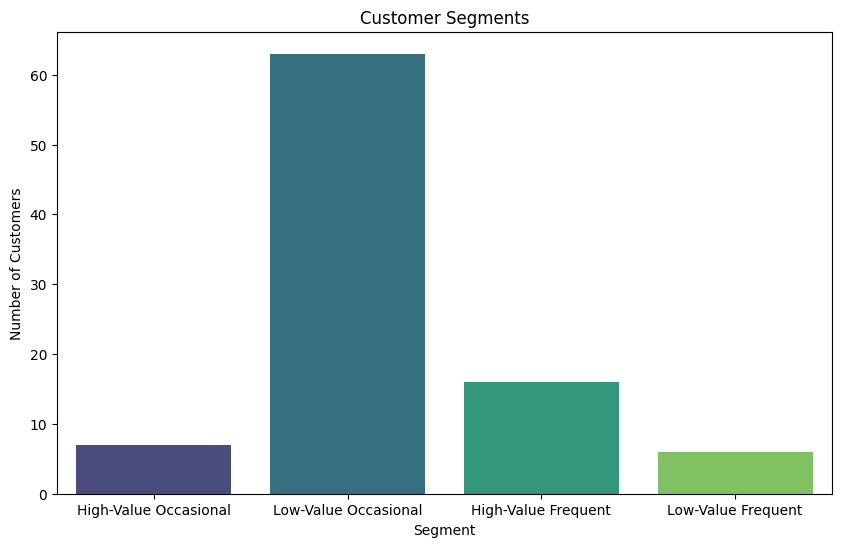

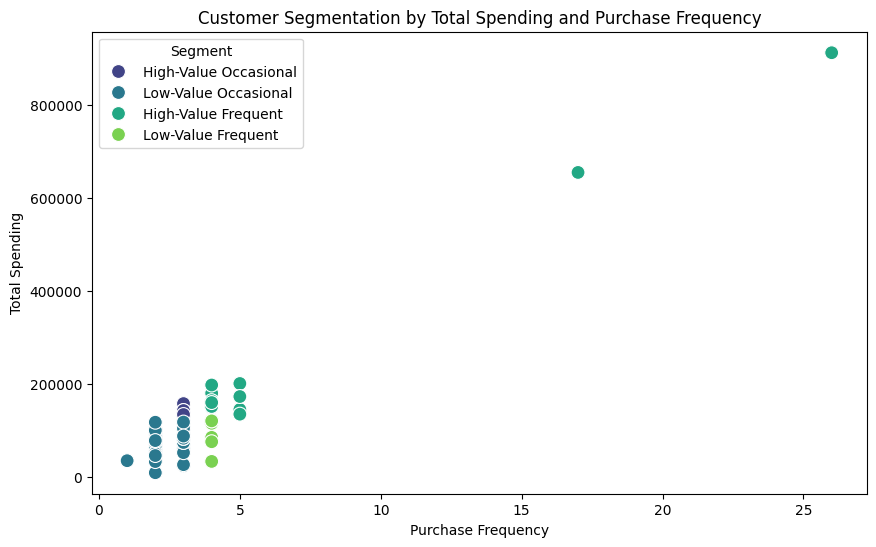

In [12]:
# Visualize the number of customers in each segment
plt.figure(figsize=(10, 6))
sns.countplot(x='SEGMENT', data=customer_metrics, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Scatter plot of Total Spending vs Purchase Frequency colored by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASE_FREQUENCY', y='TOTAL_SPENDING', hue='SEGMENT', data=customer_metrics, palette='viridis', s=100)
plt.title('Customer Segmentation by Total Spending and Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spending')
plt.legend(title='Segment')
plt.show()

In [13]:
#Calculate relevant metrics like customer lifetime value (CLTV) based on
#purchase history (if sufficient data exists for individual customers).
 #Calculate RFM Metrics(Recency,Frequency,Monetary Value) Key metrics in CLTV Calculations
# Assuming today's date is '2024-07-01'
today_date = pd.to_datetime('2024-07-01')

# Calculate recency by finding the most recent purchase date for each customer
recency_df = df.groupby('CUSTOMERNAME')['ORDERDATE'].max().reset_index()
recency_df['RECENCY'] = (today_date - pd.to_datetime(recency_df['ORDERDATE'])).dt.days
# Calculate frequency by counting the number of unique orders for each customer
frequency_df = df.groupby('CUSTOMERNAME')['ORDERNUMBER'].nunique().reset_index()
frequency_df.columns = ['CUSTOMERNAME', 'FREQUENCY']
# Calculate monetary value by summing up total spending for each customer
monetary_df = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
monetary_df.columns = ['CUSTOMERNAME', 'MONETARY_VALUE']
# Calculate average order value (AOV) for each customer
df['ORDER_TOTAL'] = df['QUANTITYORDERED'] * df['PRICEEACH']
aov_df = df.groupby('CUSTOMERNAME')['ORDER_TOTAL'].mean().reset_index()
aov_df.columns = ['CUSTOMERNAME', 'AOV']
 #Merge RFM metrics with AOV
rfm = pd.merge(recency_df[['CUSTOMERNAME', 'RECENCY']], frequency_df, on='CUSTOMERNAME')
rfm = pd.merge(rfm, monetary_df, on='CUSTOMERNAME')
rfm = pd.merge(rfm, aov_df, on='CUSTOMERNAME')
# Assuming average lifespan of a customer relationship is 3years(2003,2004,2005)
average_lifespan = 3
# Calculate CLTV using RFM and AOV
rfm['CLTV'] = (rfm['AOV'] * rfm['FREQUENCY'] * rfm['MONETARY_VALUE'] * average_lifespan) / rfm['RECENCY']
print(rfm.head())

              CUSTOMERNAME  RECENCY  FREQUENCY  MONETARY_VALUE          AOV  \
0           AV Stores, Co.     7166          3       157807.81  2683.789216   
1             Alpha Cognac     7035          3        70488.44  2944.264000   
2       Amica Models & Co.     7235          2        94117.26  2794.038846   
3  Anna's Decorations, Ltd     7054          4       153996.13  2636.095870   
4        Atelier graphique     7158          3        24179.96  3030.451429   

            CLTV  
0  531915.446227  
1  265505.214893  
2  218079.292771  
3  690584.455155  
4   92132.683560  


In [14]:
# Merge segmentation() with main DataFrame
df = pd.merge(df, rfm[['CUSTOMERNAME', 'CLTV']], on='CUSTOMERNAME', how='left')
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... MSRP  PRODUCTCODE  \
0 2003-02-24  Shipped       1         2     2003  ...   95     S10_1678   
1 2003-05-07  Shipped       2         5     2003  ...   95     S10_1678   
2 2003-07-01  Shipped       3         7     2003  ...   95     S10_1678   
3 2003-08-25  Shipped       3         8     2003  ...   95     S10_1678   
4 2003-10-10  Shipped       4        10     2003  ...   95     S10_1678   

               CUSTOMERNAME           CITY COUNTRY      TERRITORY DEALSIZE  \
0         Land of Toys Inc.           

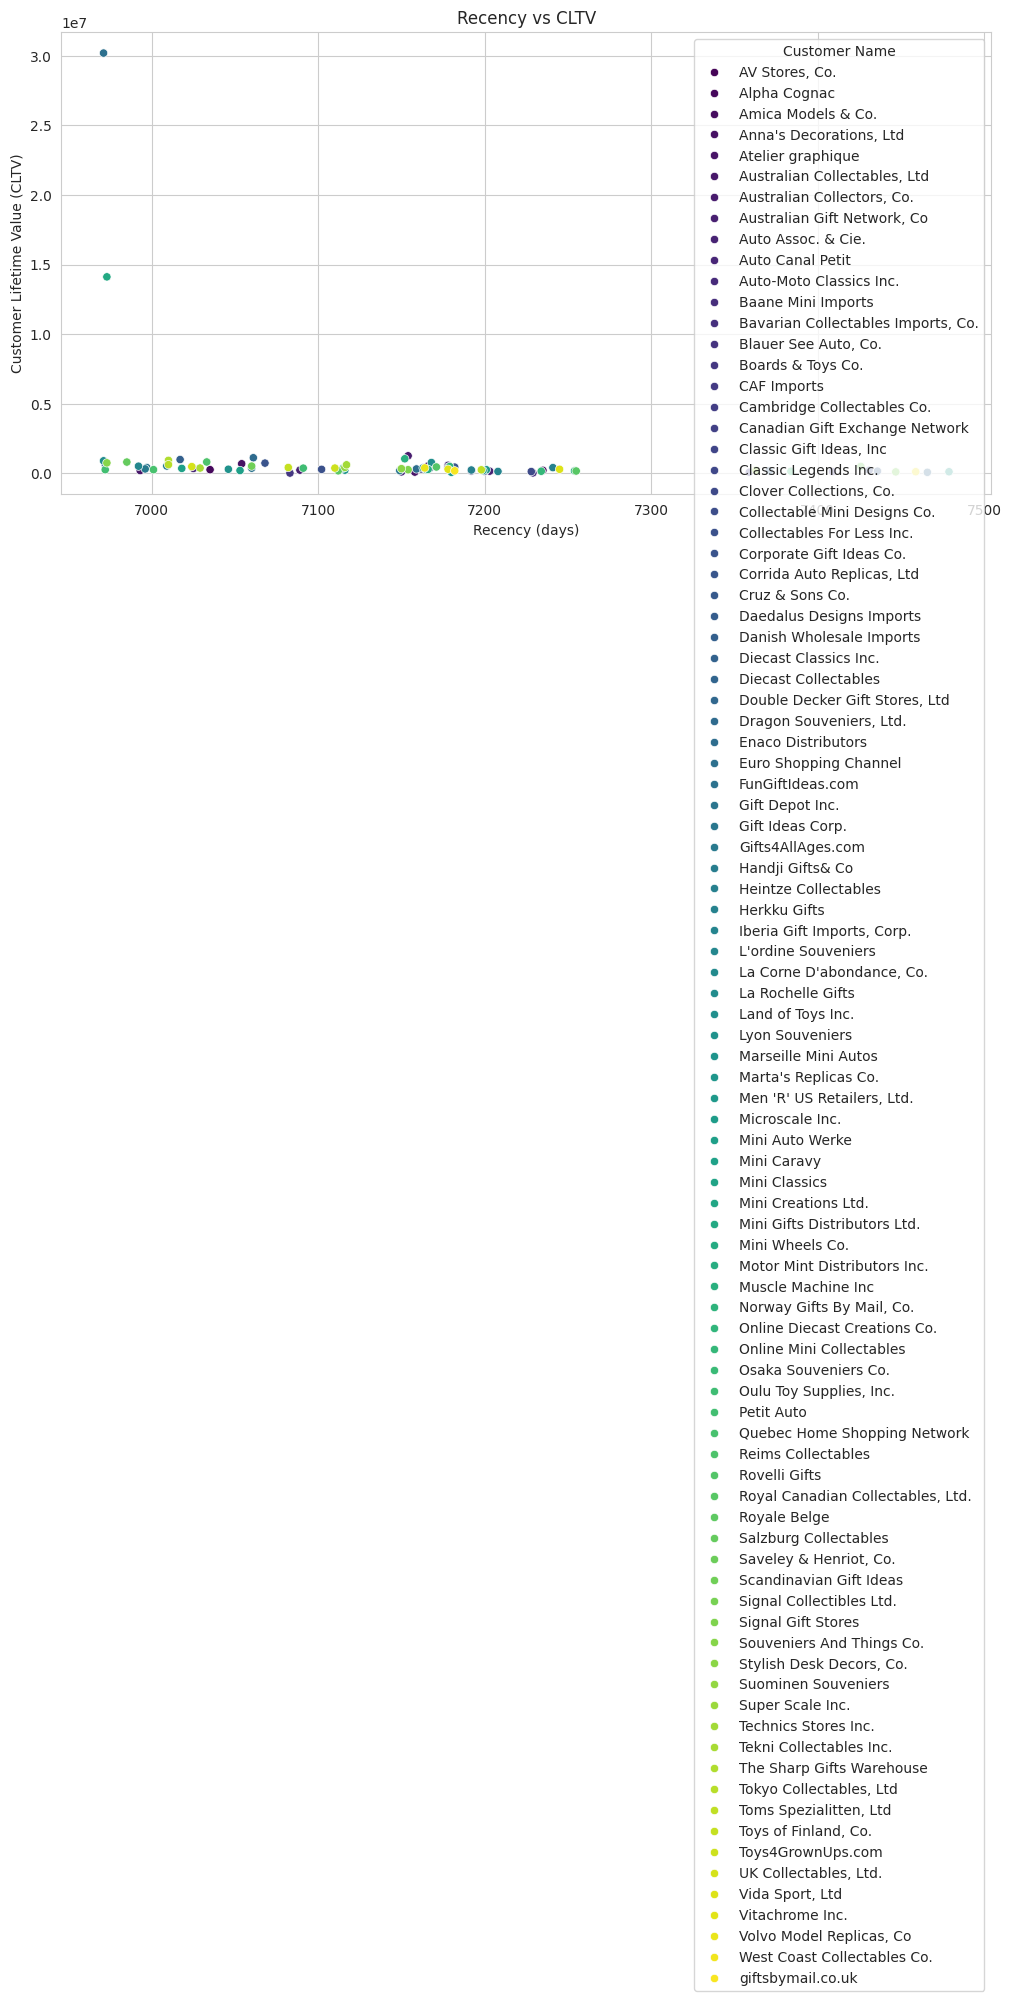

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Plot Recency vs CLTV
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='RECENCY', y='CLTV', hue='CUSTOMERNAME', palette='viridis')
plt.title('Recency vs CLTV')
plt.xlabel('Recency (days)')
plt.ylabel('Customer Lifetime Value (CLTV)')
plt.legend(title='Customer Name')
plt.show()

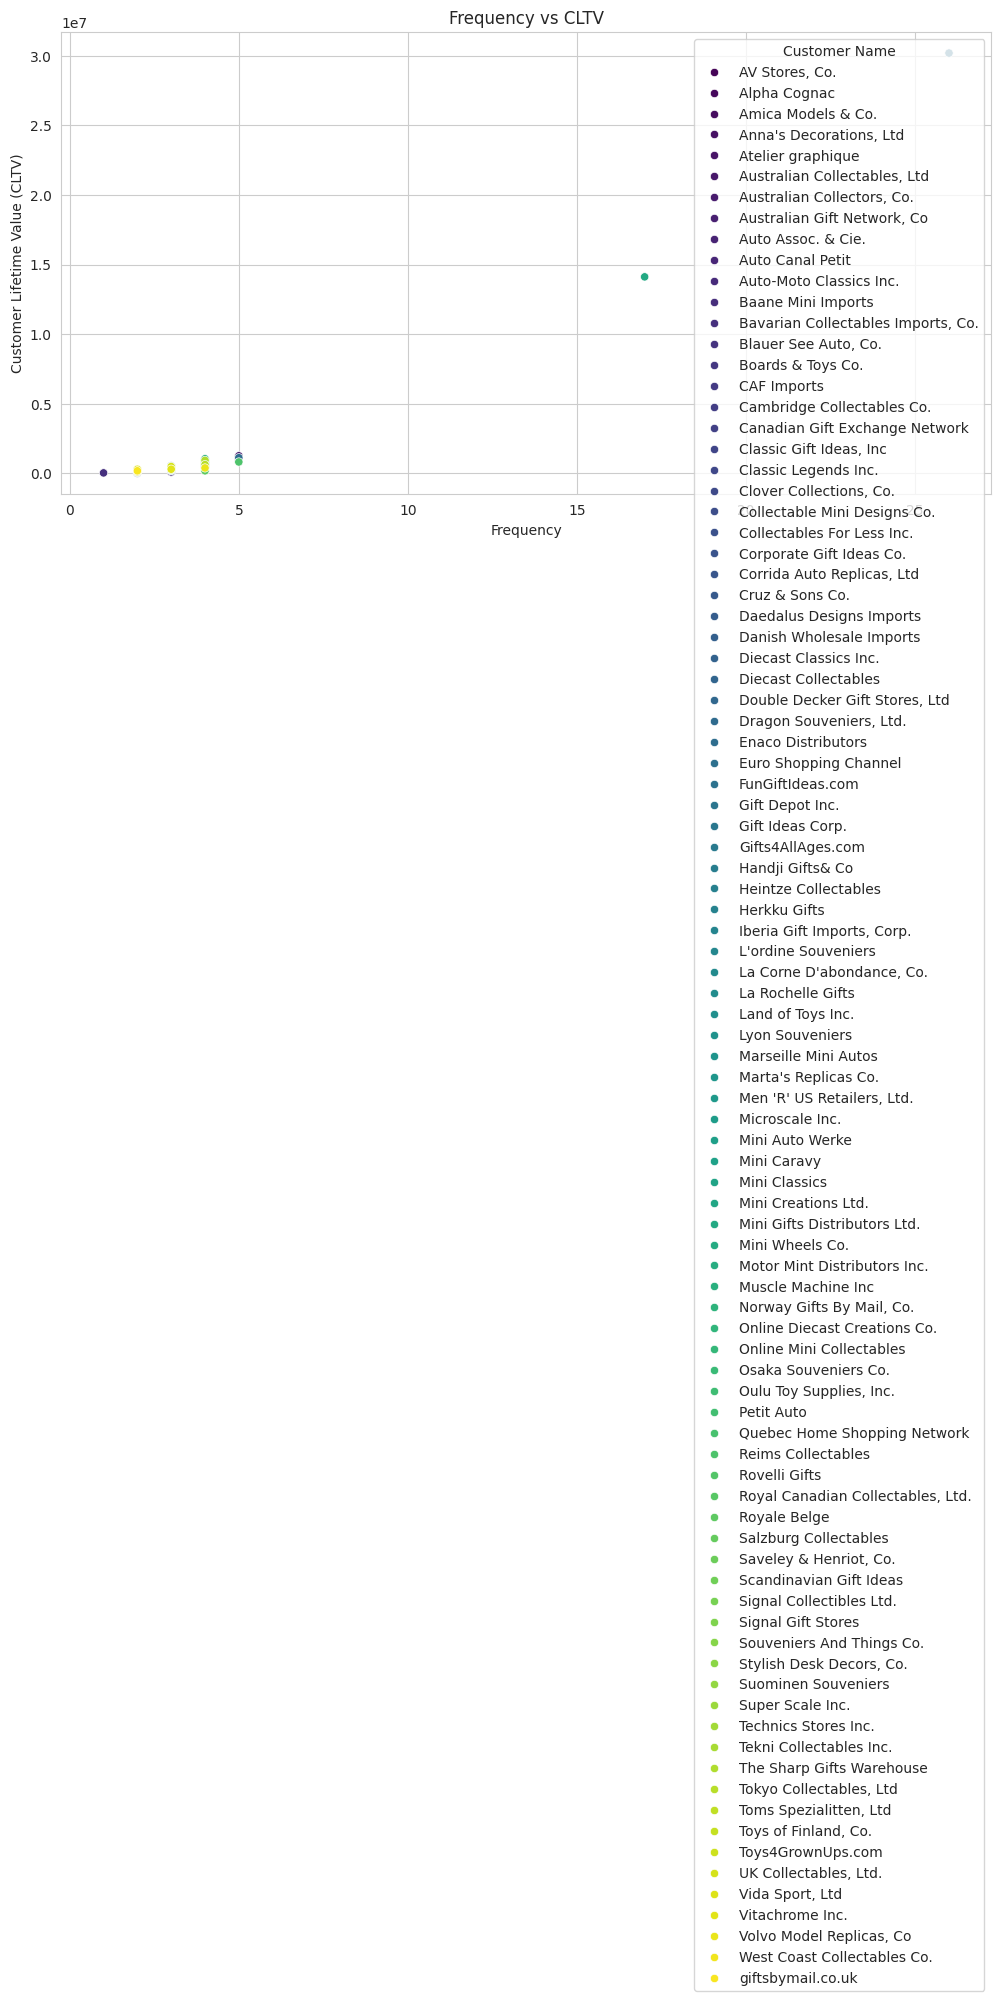

In [16]:
# Plot Frequency vs CLTV
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='FREQUENCY', y='CLTV', hue='CUSTOMERNAME', palette='viridis')
plt.title('Frequency vs CLTV')
plt.xlabel('Frequency')
plt.ylabel('Customer Lifetime Value (CLTV)')
plt.legend(title='Customer Name')
plt.show()

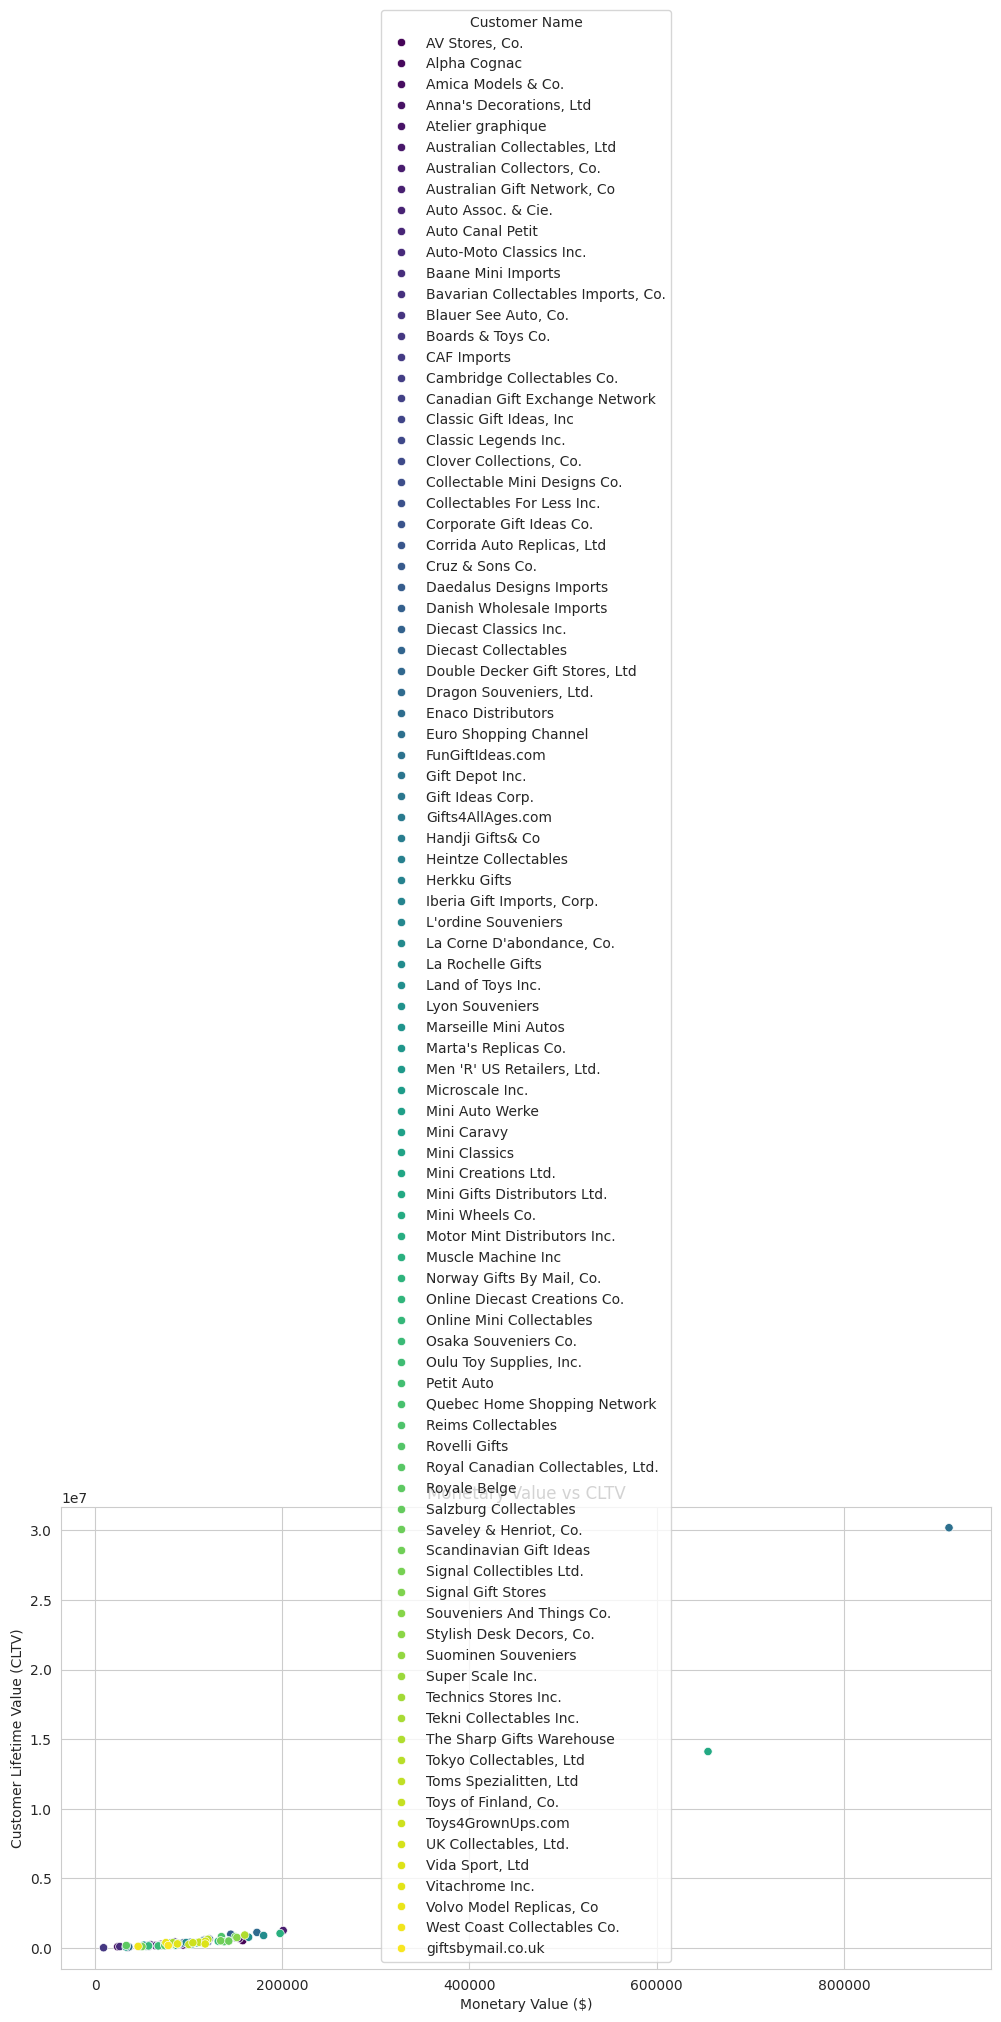

In [17]:
# Plot Monetary Value vs CLTV
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='MONETARY_VALUE', y='CLTV', hue='CUSTOMERNAME', palette='viridis')
plt.title('Monetary Value vs CLTV')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Customer Lifetime Value (CLTV)')
plt.legend(title='Customer Name')
plt.show()

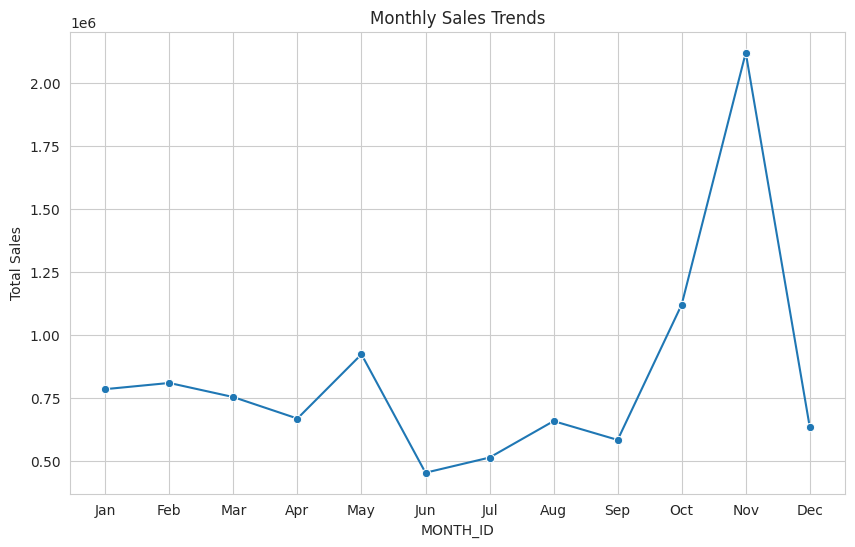

In [18]:
#Analyze trends over time (e.g., monthly, quarterly) to identify seasonal
#buying patterns or changes in customer behavior.
monthly_data = df.groupby('MONTH_ID')['SALES'].sum().reset_index()
quarterly_data = df.groupby('QTR_ID')['SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, x='MONTH_ID', y='SALES', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('MONTH_ID')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

<ipython-input-19-d8fbd3b882f7>:3: FutureWarning: Using palette without hue assignment is deprecated
  warnings.warn("Using palette without hue assignment is deprecated", FutureWarning)
<ipython-input-19-d8fbd3b882f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_data, x='QTR_ID', y='SALES', palette='viridis')


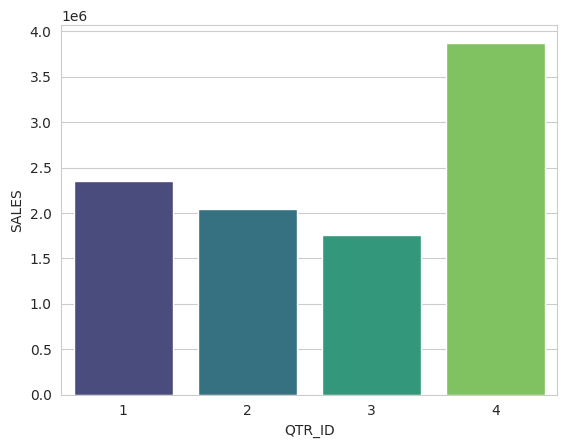

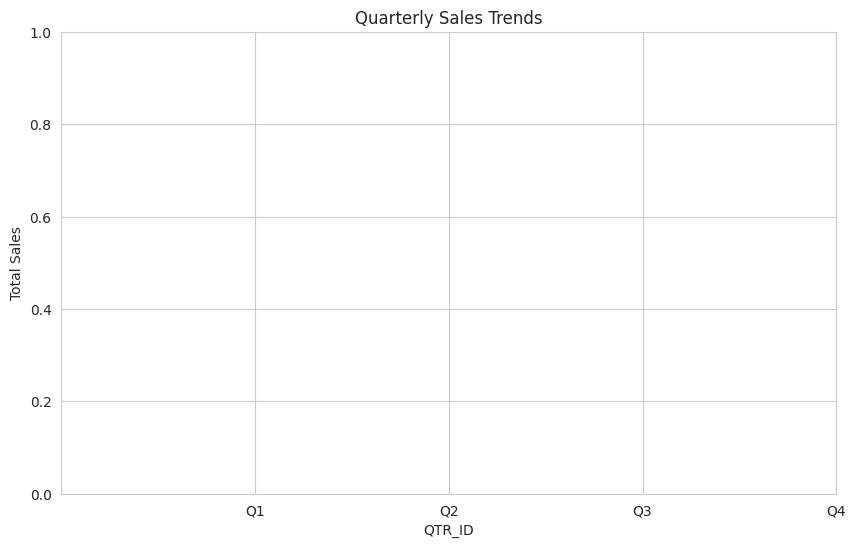

In [19]:
# Bar plot for quarterly trends
# Suppress the warning temporarily
warnings.warn("Using palette without hue assignment is deprecated", FutureWarning)
sns.barplot(data=quarterly_data, x='QTR_ID', y='SALES', palette='viridis')
plt.figure(figsize=(10, 6))
plt.title('Quarterly Sales Trends')
plt.xlabel('QTR_ID')
plt.ylabel('Total Sales')
plt.xticks(range(1, 5), labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(True)
plt.show()

In [20]:
df.to_excel('/content/drive/MyDrive/Sales_Data_Cleaned.xlsx', index=False)